In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


%matplotlib inline

## Impotring and preprocessing the data

In [6]:
train_set = pd.read_csv("C:/Users/Israel Gitler/Desktop/F-Mnist/archive/fashion-mnist_train.csv")
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_set = pd.read_csv("C:/Users/Israel Gitler/Desktop/F-Mnist/archive/fashion-mnist_test.csv")


In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


### Let's look on how many different labels we have

In [11]:
train_set['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

### We can see that we have 10 different labels with the same amount of images- our data is balanced:)

### Splitting the datasets to features(X) and labels(Y)

In [12]:
y_train= train_set['label']
x_train= train_set.drop('label',axis=1)

y_test= test_set['label']
x_test= test_set.drop('label',axis=1)

x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Let's take a look at the first few images:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

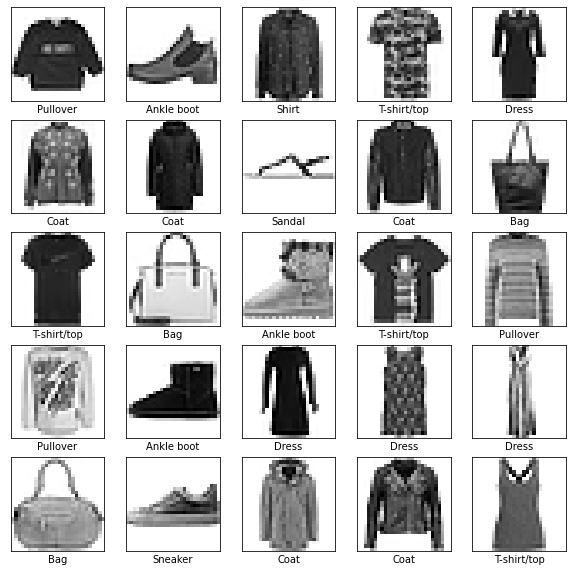

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.to_numpy()[i].reshape(28, 28), cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

# PCA

In [13]:
pca = PCA(n_components = 0.95)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)
x_test_reduced = pca.transform(x_test)

In [14]:
x_reduced=pd.DataFrame(x_reduced)
x_test_reduced=pd.DataFrame(x_test_reduced)
x_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,940.014979,1264.934899,-13.064134,-697.003948,99.905650,293.040479,223.353000,654.699441,284.169728,200.495125,...,-42.436469,38.644515,15.974610,-18.360482,-31.716402,-58.744054,-31.525509,17.666469,10.700451,-54.208245
1,-1115.990760,984.569965,-497.105409,-204.810444,115.129828,-198.891667,-313.694307,258.705462,-360.168936,-251.335571,...,21.729339,51.967370,30.980098,-61.325772,-8.092893,-48.800220,11.925639,-26.394060,-41.801588,-74.007615
2,1852.613740,400.032947,590.385818,56.610980,267.259426,-296.297905,-272.963581,-76.956373,109.972847,-23.027752,...,-3.820852,44.684383,5.886265,24.918999,35.253455,15.379829,-32.078273,19.471497,23.206138,9.703616
3,823.085923,-592.940376,-165.572091,306.296837,-69.867933,1012.740395,-133.880739,-34.479930,12.906323,-158.113744,...,55.506988,21.737585,-52.867262,24.045966,-75.577396,11.929428,31.501251,-36.039384,12.481911,57.567270
4,1057.325178,-1029.965513,-386.387941,-474.653146,143.147534,17.124217,-177.609814,-40.151143,518.806548,-85.716816,...,43.530980,2.660544,-53.363713,19.373099,36.444743,19.966894,26.720703,68.268379,14.564382,-37.426796


so we got that 187 compomemts explain 95% of the variance

### Let's look at the image before and after the pca:

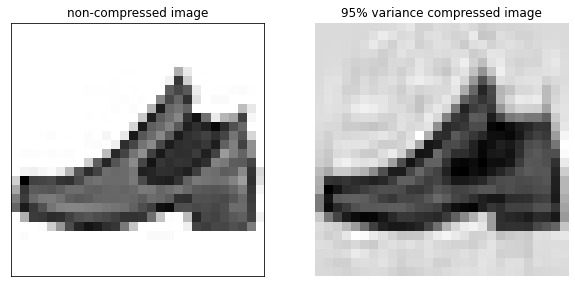

In [15]:


plt.figure(figsize=(10,10))
plt.subplot(1,2, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('non-compressed image')
plt.imshow(x_train.to_numpy()[1].reshape(28, 28), cmap="binary")


plt.subplot(1,2, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('95% variance compressed image')
plt.imshow(x_recovered[1].reshape(28, 28), cmap="binary")

plt.axis("off")
plt.show()

### We can still identify that it is a shoe.. let's look for the least components that explain the most variance

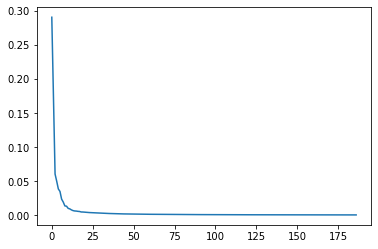

In [16]:
plt.plot(pca.explained_variance_ratio_)

In [17]:
pca.explained_variance_ratio_[:10]

array([0.29011353, 0.17727668, 0.060227  , 0.04970272, 0.03839289,
       0.03470997, 0.02344044, 0.01913937, 0.01343605, 0.01310725])

Most of the variance lies along the first two components

Lets try to reduce the data to 2 and see what happens:


In [18]:
pca_2 = PCA(n_components = 2)
x_reduced_2 = pca_2.fit_transform(x_train)
x_recovered_2 = pca_2.inverse_transform(x_reduced_2)

2 components compressed image


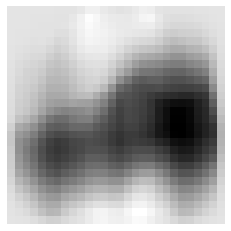

In [19]:
print('2 components compressed image')
plt.imshow(x_recovered_2[1].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

so we can see that when we used only the 2 highest components (that explain the data) we got an unrecognizable image. 
so we will stay with the 187 components- which is still pretty amazing to reduce from 785 pixels of the original images.

# Models

## Dummy Model

Because our data is divided equally between the 10 different labels, the best dummy model will simply say that all the images are one of the 10 labels and will get a 10% accuracy.(we don't think that it is needed to show this in the code because it is too obvious)

# knn

### KNN with pca reduced data

In [27]:
knn=KNeighborsClassifier()

In [17]:
scores=cross_val_score(knn, x_reduced, y_train, cv=10)
knn_score = scores.mean()
print(knn_score)

0.8650833333333333


### Knn with k-means clustring 

In [16]:
knn_k_means=KNeighborsClassifier()

In [17]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("knn", knn_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
knn_k_means_score = scores.mean()
print(knn_k_means_score)

0.7831333333333333


## Randon forest classifier

### Randon forest with pca reduced data

In [18]:
rfc=RandomForestClassifier(random_state=42) 

In [19]:
scores=cross_val_score(rfc, x_reduced, y_train, cv=10)
rfc_score = scores.mean()
print(rfc_score)

0.8641166666666666


### Random forest with k-means clustring

In [20]:
rfc_k_means=RandomForestClassifier(random_state=42) 

In [21]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("rfc", rfc_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
rfc_k_means_score = scores.mean()
print(rfc_k_means_score)

0.7961666666666666


## Naive bayes

### Naive Bayes with pca reduced data

In [51]:
gnb = GaussianNB()

In [52]:
scores=cross_val_score(gnb, x_reduced, y_train, cv=10)
gnb_score = scores.mean()
print(gnb_score)

0.74695


### Naive bayes with k-means clustring 

In [22]:
gnb_k_means=GaussianNB()

In [23]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("gnb", gnb_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
gnb_k_means_score = scores.mean()
print(gnb_k_means_score)

0.6206500000000001


## We see that when we use the models on the k-means method we get much lower scores than the models that are used on the reduced pca data. so from now on we'll continue only with the pca reduced data

## voting classifier

### we' ll take 3 different models and try an ensamble learning method of voting classifier (hard and soft) to get a better score

In [53]:
clf1=KNeighborsClassifier()
clf2=RandomForestClassifier(random_state=42) 
clf3=GaussianNB()
labels=['Knn','Random forest','Naive Beyes']
voting_clf_hard= VotingClassifier(estimators=[(labels[0],clf1),
                                            (labels[1],clf2),
                                            (labels[2],clf3)],
                                 voting='hard')
voting_clf_soft= VotingClassifier(estimators=[(labels[0],clf1),
                                            (labels[1],clf2),
                                            (labels[2],clf3)],
                                 voting='soft')

In [54]:
voting_clf_scores = []
for (clf, label) in zip([voting_clf_hard, voting_clf_soft],['Voting Classifier Hard', 'Voting Classifier Soft']):
    scores= cross_val_score(clf,x_reduced,y_train,cv=5,scoring='accuracy')
    voting_clf_scores.append(scores.mean())
    print('Accuracy of '+ label+':', scores.mean(),'%')

voting_clf_hard_score = voting_clf_scores[0]
voting_clf_soft_score = voting_clf_scores[1]

Accuracy of Voting Classifier Hard: 0.86405 %
Accuracy of Voting Classifier Soft: 0.8481166666666666 %


## AdaBoost- using decision tree classifier

In [22]:
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm="SAMME.R", learning_rate=0.3)
scores=cross_val_score(ada, x_reduced, y_train, cv=10)
ada_score = scores.mean()
print(ada_score)

0.5522166666666666


## The best score is with the knn model..let's try to tweak the K neighbors to get an even better score

In [25]:
k_range = list(range(1,31))

In [28]:
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [29]:
grid.fit(x_reduced,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [30]:
print(grid.best_index_)
print(grid.best_params_)

4
{'n_neighbors': 5}


## So we found that the best k is 5 - the same as the defult hyperparameter..

## Let's run the test set with our best hyperparameters to get the real score

In [32]:
knn.fit(x_reduced, y_train)
knn.score(x_test_reduced, y_test)

0.868

# Wow!! we got a 86% accuracy that's so awesome!!!:)
## (and without image processing methods) 

# In conclusion:

## we pre-processed our data, tried a couple models, used kmeans and pca method, and different ensemble learning methods and tweaked the hyperparameter to get the best score.

## We see that we got a much higher score than the "cats and dogs" project even though we didn't use here image processing methods. we think that it's because the images in the fashion mnist data are much simpler than the images of the "cats and dogs" data (that are actually pictures and not a computer illustration)